# pypdb demos

This is a set of basic examples of the kinds of queries and formats used by pypdb. There are generally two types of function:

+ Functions that perform searches and return lists of PDB IDs
+ Functions that get information about specific PDB IDs

The list of supported search types, as well as the different types of information that can be returned for a given PDB ID, is large (and growing) and is enumerated completely in the docstrings of pypdb.py. The PDB allows a very wide range of different types of queries, and so any option that is not currently available can likely be implemented pretty easily based on the structure of the query types that have already been implemented. I appreciate any feedback and pull requests.

### Preamble

In [1]:
%pylab inline
from IPython.display import HTML

from pypdb.pypdb import *

import pprint

Populating the interactive namespace from numpy and matplotlib


# 1. Search functions that return lists of PDB IDs

### Get a list of PDBs for a specific search term

In [2]:
search_dict = make_query('actin network')
found_pdbs = do_search(search_dict)
print(found_pdbs)

['1D7M', '3W3D', '4A7H', '4A7L', '4A7N']


### Search by a specific modified structure

In [14]:
search_dict = make_query('3W3D',querytype='ModifiedStructuresQuery')
found_pdbs = do_search(search_dict)
print(found_pdbs)

['1QLJ', '1S3T', '2F5N', '2G9V', '2N46', '2N47', '2N48', '2RNM', '2Z0P', '3DLL', '3F6F', '3G7I', '3GH6', '3MAK', '3WH8', '3X0E', '3X0F', '3X0G', '4C16', '4COU', '4COV', '4COW', '4COY', '4COZ', '4CSY', '4CZS', '4D3W', '4MTL', '4PF7', '4PF9', '4PFC', '4QR9', '4RVK', '4RVL', '4RX4', '4RZQ', '4TL6', '4TL7', '4TLC', '4TLD', '4TLE', '4TRW', '4TSD', '4U54', '4U58', '4U5L', '4U5N', '4U5O', '4U5S', '4U5U', '4U5V', '4UMS', '4URP', '4X43', '4XK8', '4XPN', '4XS0', '4XTT', '4Y0P', '4Y0Q', '4Y0R', '4Y0S', '4Y2H', '4Y30', '4YDX', '4YE3', '4YEA', '4YGW', '4YHQ', '4YL0', '4YL1', '4YMG', '4YMH', '4YMK', '4YMR', '4YND', '4YO6', '4YP3', '4YP8', '4YQW', '4YQX', '4YR0', '4YR2', '4YR3', '4YUE', '4YVC', '4YVE', '4Z1L', '4Z2G', '4Z2H', '4Z2I', '4Z2J', '4Z2K', '4Z2L', '4Z3W', '4Z3X', '4Z3Y', '4Z3Z', '4Z40', '4Z93', '4ZCH', '4ZFP', '4ZGD', '4ZGE', '4ZGJ', '4ZIQ', '4ZIU', '4ZJG', '4ZJH', '4ZMJ', '4ZN4', '4ZN8', '4ZOV', '4ZOX', '4ZOY', '4ZOZ', '5A2I', '5A2J', '5A2K', '5A2L', '5ALS', '5AUN', '5AUO', '5AUP', '5AUQ',

### Search by Author

In [5]:
search_dict = make_query('Perutz, M.F.',querytype='AdvancedAuthorQuery')
found_pdbs = do_search(search_dict)
print(found_pdbs)

['1CQ4', '1FDH', '1GDJ', '1HDA', '1PBX', '2DHB', '2GDM', '2HHB', '2MHB', '3HHB', '4HHB']


### Search by Motif

In [8]:
search_dict = make_query('T[AG]AGGY',querytype='MotifQuery')
found_pdbs = do_search(search_dict)
print(found_pdbs)

['3LEZ', '3SGH', '4F47']


### Search by a specific experimental method

In [20]:
search_dict = make_query('SOLID-STATE NMR',querytype='ExpTypeQuery')
found_pdbs = do_search(search_dict)
print(found_pdbs)

['1CEK', '1EQ8', '1M8M', '1MAG', '1MP6', '1MZT', '1NH4', '1NYJ', '1PI7', '1PI8', '1PJD', '1PJE', '1PJF', '1Q7O', '1RVS', '1XSW', '1ZN5', '1ZY6', '2C0X', '2CZP', '2E8D', '2H3O', '2H95', '2JSV', '2JU6', '2JZZ', '2K0P', '2KAD', '2KB7', '2KHT', '2KIB', '2KJ3', '2KLR', '2KQ4', '2KQT', '2KRJ', '2KSJ', '2KWD', '2KYV', '2L0J', '2L3Z', '2LBU', '2LEG', '2LGI', '2LJ2', '2LME', '2LMN', '2LMO', '2LMP', '2LMQ', '2LNL', '2LNQ', '2LNY', '2LPZ', '2LTQ', '2LU5', '2M02', '2M3B', '2M3G', '2M4J', '2M5K', '2M5M', '2M5N', '2M67', '2MC7', '2MCU', '2MCV', '2MCW', '2MCX', '2MEX', '2MJZ', '2MME', '2MMU', '2MPZ', '2MSG', '2MTZ', '2MVX', '2MXU', '2N0R', '2NNT', '2RLZ', '2UVS', '2W0N', '2XKM', '3ZPK']


### Search by whether it has free ligands

In [4]:
search_dict = make_query('', querytype='NoLigandQuery')
found_pdbs = do_search(search_dict)
print(found_pdbs[:10])

['100D', '101D', '101M', '102D', '102L', '102M', '103L', '103M', '104M', '105M']


### Estimate total number of depositions versus time

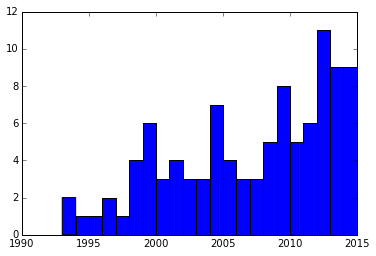

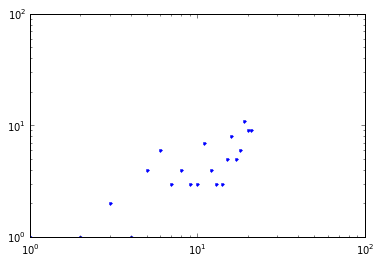

In [7]:
# Choose a random sample because we don't want to call the database for every single entry
from random import choice

all_pdbs = get_all()

all_dates = list()

for ii in range(100):
    pdb_desc = describe_pdb( choice(all_pdbs) )
    depdate = (pdb_desc['deposition_date'])
    all_dates.append( int(depdate[:4]) )
    
all_dates = array(all_dates)

figure()
subs_v_time = hist(all_dates, max(all_dates)-min(all_dates))
show(subs_v_time)   

# Show power-law scaling
figure()
loglog(subs_v_time[0],'.')

# New CRISPR entries versus time

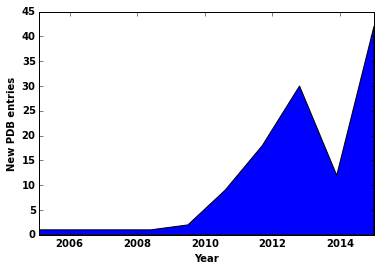

In [16]:
# structure request and perform request
search_dict = make_query('CRISPR')
crispr_results = do_search(search_dict)

# Iterate through resulting PDBs
# and record dates
all_dates = list()
for pdb in crispr_results:
    pdb_desc = describe_pdb( pdb )
    depdate = (pdb_desc['deposition_date'])
    all_dates.append( int(depdate[:4]) )
all_dates = array(all_dates)
dates, num_entries = subs_v_time[1][1:],subs_v_time[0]
fill_between(dates, 0, num_entries)

# Formatting the plots
xlim([dates[0], dates[-1]] )
gca().xaxis.set_major_formatter(FormatStrFormatter('%d'))
xticks(fontweight='bold')
yticks(fontweight='bold')
xlabel('Year',fontweight='bold')
ylabel('New PDB entries',fontweight='bold')

# 2. Functions that return information about single PDB entries

### Get a general description of the entry's metadata

In [4]:
describe_pdb('4lza')

{'citation_authors': 'Malashkevich, V.N., Bhosle, R., Toro, R., Hillerich, B., Gizzi, A., Garforth, S., Kar, A., Chan, M.K., Lafluer, J., Patel, H., Matikainen, B., Chamala, S., Lim, S., Celikgil, A., Villegas, G., Evans, B., Love, J., Fiser, A., Khafizov, K., Seidel, R., Bonanno, J.B., Almo, S.C.',
 'deposition_date': '2013-07-31',
 'expMethod': 'X-RAY DIFFRACTION',
 'keywords': 'TRANSFERASE',
 'last_modification_date': '2013-08-14',
 'nr_atoms': '0',
 'nr_entities': '1',
 'nr_residues': '390',
 'release_date': '2013-08-14',
 'resolution': '1.84',
 'status': 'CURRENT',
 'structureId': '4LZA',
 'structure_authors': 'Malashkevich, V.N., Bhosle, R., Toro, R., Hillerich, B., Gizzi, A., Garforth, S., Kar, A., Chan, M.K., Lafluer, J., Patel, H., Matikainen, B., Chamala, S., Lim, S., Celikgil, A., Villegas, G., Evans, B., Love, J., Fiser, A., Khafizov, K., Seidel, R., Bonanno, J.B., Almo, S.C., New York Structural Genomics Research Consortium (NYSGRC)',
 'title': 'Crystal structure of adenin

### Get all of the information deposited in a PDB entry

In [2]:
get_all_info('4lza')

{'id': '4LZA',
 'polymer': {'@entityNr': '1',
  '@length': '195',
  '@type': 'protein',
  '@weight': '22023.9',
  'Taxonomy': {'@id': '340099',
   '@name': 'Thermoanaerobacter pseudethanolicus ATCC 33223'},
  'chain': [{'@id': 'A'}, {'@id': 'B'}],
  'enzClass': {'@ec': '2.4.2.7'},
  'macroMolecule': {'@name': 'Adenine phosphoribosyltransferase',
   'accession': {'@id': 'B0K969'}},
  'polymerDescription': {'@description': 'Adenine phosphoribosyltransferase'},
  'synonym': {'@name': 'APRT'}}}

In [9]:
results = get_all_info('2F5N')
first_polymer = results['polymer'][0]
first_polymer['polymerDescription']

{'@description': "5'-D(*AP*GP*GP*TP*AP*GP*AP*CP*CP*TP*GP*GP*AP*CP*GP*C)-3'"}

### Run a BLAST search on an entry

There are several options here: One function, get_blast(), returns a dict() just like every other function. However, all the metadata associated with this function leads to deeply-nested dictionaries. A simpler function, get_blast2(), uses text parsing on the raw output page, and it returns a tuple consisting of 1. a ranked list of other PDB IDs that were hits, and 2. A list of the actual BLAST alignments and similarity scores.

In [4]:
blast_results = get_blast('2F5N', chain_id='A')
just_hits = blast_results['BlastOutput_iterations']['Iteration']['Iteration_hits']['Hit']
print(just_hits[50]['Hit_hsps']['Hsp']['Hsp_hseq'])

PELPEVETVRRELEKRIVGQKIISIEATYPRMVL--TGFEQLKKELTGKTIQGISRRGKYLIFEIGDDFRLISHLRMEGKYRLATLDAPREKHDHLTMKFADG-QLIYADVRKFGTWELISTDQVLPYFLKKKIGPEPTYEDFDEKLFREKLRKSTKKIKPYLLEQTLVAGLGNIYVDEVLWLAKIHPEKETNQLIESSIHLLHDSIIEILQKAIKLGGSSIRTY-SALGSTGKMQNELQVYGKTGEKCSRCGAEIQKIKVAGRGTHFCPVCQQ


In [5]:
blast_results = get_raw_blast('2F5N', chain_id='A', output_form='HTML')
HTML(blast_results)

In [6]:
blast_results = get_blast2('2F5N', chain_id='A', output_form='HTML')
print('Total Results: ' + str(len(blast_results[0])) +'\n')
pprint.pprint(blast_results[1][50])

Total Results: 84

<pre>
&gt;<a name="34138"></a>1XC8:3:A|pdbid|entity|chain(s)|sequence
          Length = 271

 Score =  211 bits (536), Expect = 1e-54,   Method: Composition-based stats.
 Identities = 115/274 (41%), Positives = 162/274 (59%), Gaps = 5/274 (1%)

Query: 2   PELPEVETIRRTLLPLIVGKTIEDVRIFWPNIIRHPRDSEAFAARMIGQTVRGLERRGKF 61
           PELPEVET+RR L   IVG+ I  +   +P ++      E     + G+T++G+ RRGK+
Sbjct: 1   PELPEVETVRRELEKRIVGQKIISIEATYPRMVL--TGFEQLKKELTGKTIQGISRRGKY 58

Query: 62  LKFLLDRD-ALISHLRMEGRYAVASALEPLEPHTHVVFCFTDGSELRYRDVRKFGTMHVY 120
           L F +  D  LISHLRMEG+Y +A+   P E H H+   F DG +L Y DVRKFGT  + 
Sbjct: 59  LIFEIGDDFRLISHLRMEGKYRLATLDAPREKHDHLTMKFADG-QLIYADVRKFGTWELI 117

Query: 121 AKEEADRRPPLAELGPEPLSPAFSPAVLAERAVKTKRSVKALLLDCTVVAGFGNIYVDES 180
           + ++        ++GPEP    F   +  E+  K+ + +K  LL+ T+VAG GNIYVDE 
Sbjct: 118 STDQVLPYFLKKKIGPEPTYEDFDEKLFREKLRKSTKKIKPYLLEQTLVAGLGNIYVDEV 177

Query: 181 LFRAGILPGRPAASLSSKEIERLHEEMVATIGEAVMKGGSTVRTYVNTQGE

### Get PFAM information about an entry

In [2]:
get_pfam('2LME')

{'pfamHit': {'@chainId': 'A',
  '@eValue': '5.0E-22',
  '@pdbResNumEnd': '105',
  '@pdbResNumStart': '28',
  '@pfamAcc': 'PF03895.10',
  '@pfamDesc': 'YadA-like C-terminal region',
  '@pfamName': 'YadA_anchor',
  '@structureId': '2LME'}}

### Get chemical info

This function takes the name of the chemical, not a PDB ID

In [7]:
describe_chemical('NAG')

{'describeHet': {'ligandInfo': {'ligand': {'@chemicalID': 'NAG',
    '@molecularWeight': '221.208',
    '@type': 'D-saccharide',
    'InChI': 'InChI=1S/C8H15NO6/c1-3(11)9-5-7(13)6(12)4(2-10)15-8(5)14/h4-8,10,12-14H,2H2,1H3,(H,9,11)/t4-,5-,6-,7-,8-/m1/s1',
    'InChIKey': 'OVRNDRQMDRJTHS-FMDGEEDCSA-N',
    'chemicalName': 'N-ACETYL-D-GLUCOSAMINE',
    'formula': 'C8 H15 N O6',
    'smiles': 'CC(=O)N[C@@H]1[C@H]([C@@H]([C@H](O[C@H]1O)CO)O)O'}}}}

### Get ligand info if present


In [6]:
get_ligands('100D')

{'id': '100D',
 'ligandInfo': {'ligand': {'@chemicalID': 'SPM',
   '@molecularWeight': '202.34',
   '@structureId': '100D',
   '@type': 'non-polymer',
   'InChI': 'InChI=1S/C10H26N4/c11-5-3-9-13-7-1-2-8-14-10-4-6-12/h13-14H,1-12H2',
   'InChIKey': 'PFNFFQXMRSDOHW-UHFFFAOYSA-N',
   'chemicalName': 'SPERMINE',
   'formula': 'C10 H26 N4',
   'smiles': 'C(CCNCCCN)CNCCCN'}}}

### Get gene ontology info

In [10]:
get_gene_onto('4Z0L ')

{'term': [{'@chainId': 'A',
   '@id': 'GO:0001516',
   '@structureId': '4Z0L',
   'detail': {'@definition': 'The chemical reactions and pathways resulting in the formation of prostaglandins, any of a group of biologically active metabolites which contain a cyclopentane ring.',
    '@name': 'prostaglandin biosynthetic process',
    '@ontology': 'B',
    '@synonyms': 'prostaglandin anabolism, prostaglandin biosynthesis, prostaglandin formation, prostaglandin synthesis'}},
  {'@chainId': 'A',
   '@id': 'GO:0001525',
   '@structureId': '4Z0L',
   'detail': {'@definition': 'Blood vessel formation when new vessels emerge from the proliferation of pre-existing blood vessels.',
    '@name': 'angiogenesis',
    '@ontology': 'B',
    '@synonyms': 'blood vessel formation from pre-existing blood vessels'}},
  {'@chainId': 'A',
   '@id': 'GO:0006629',
   '@structureId': '4Z0L',
   'detail': {'@definition': 'The chemical reactions and pathways involving lipids, compounds soluble in an organic solven

### Get sequence clusters by chain

In [3]:
get_seq_cluster('2F5N.A')

{'clusterNr': '678',
 'clusterPercID': '40',
 'pdbChain': [{'@name': '4PD2.A', '@rank': '1'},
  {'@name': '3U6P.A', '@rank': '2'},
  {'@name': '4PCZ.A', '@rank': '3'},
  {'@name': '3GPU.A', '@rank': '4'},
  {'@name': '3JR5.A', '@rank': '5'},
  {'@name': '3SAU.A', '@rank': '6'},
  {'@name': '3GQ4.A', '@rank': '7'},
  {'@name': '1R2Z.A', '@rank': '8'},
  {'@name': '3U6E.A', '@rank': '9'},
  {'@name': '2XZF.A', '@rank': '10'},
  {'@name': '2XZU.A', '@rank': '11'},
  {'@name': '3U6S.A', '@rank': '12'},
  {'@name': '3GPY.A', '@rank': '13'},
  {'@name': '1TDZ.A', '@rank': '14'},
  {'@name': '3GPX.A', '@rank': '15'},
  {'@name': '4G4N.A', '@rank': '16'},
  {'@name': '1L1Z.A', '@rank': '17'},
  {'@name': '3U6C.A', '@rank': '18'},
  {'@name': '3GQ3.A', '@rank': '19'},
  {'@name': '4G4Q.A', '@rank': '20'},
  {'@name': '3C58.A', '@rank': '21'},
  {'@name': '3U6D.A', '@rank': '22'},
  {'@name': '3U6O.A', '@rank': '23'},
  {'@name': '3GO8.A', '@rank': '24'},
  {'@name': '1L1T.A', '@rank': '25'},
  

### Get the representative for a chain

In [4]:
get_clusters('4hhb.A')

{'pdbChain': {'@name': '2W72.A'}}